# Optimization notebook
This notebook is to run a multi-objective optimization with the Zambezi model. Two alternatives will be given to that end. First implementation is with the Platypus library which has a fairly simple interface. The second implementation is the EMA Workbench which additionally offers parallelization functionality

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../src')
from model_zambezi import ModelZambezi
from model_nile import ModelNile

from platypus import NSGAII, Problem, Real

In [2]:
model = ModelZambezi()

In [11]:
model = ModelNile()

In [5]:
model.irr_districts.items()

dict_items([('USSennar', <irrigation_district.IrrigationDistrict object at 0x7f9bb2cbd0a0>), ('Gezira', <irrigation_district.IrrigationDistrict object at 0x7f9bb2cbdb20>), ('DSSennar', <irrigation_district.IrrigationDistrict object at 0x7f9bb2cbd940>), ('Taminiat', <irrigation_district.IrrigationDistrict object at 0x7f9bb2cbdcd0>), ('Hassanab', <irrigation_district.IrrigationDistrict object at 0x7f9bb2cbda00>), ('Egypt', <irrigation_district.IrrigationDistrict object at 0x7f9bb2cbd9d0>)])

In [12]:
pcount = model.overarching_policy.get_total_parameter_count()
random_policy = np.random.rand(pcount)
zero_policy = np.repeat(0, pcount)

In [10]:
np.repeat(0, 160)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [13]:
model.evaluate(zero_policy)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[nan, nan, nan]

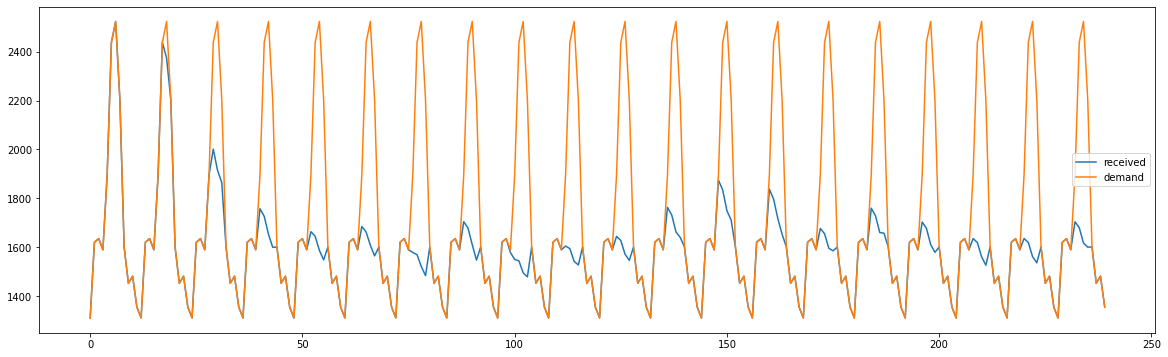

In [14]:
def plot_two_lines_together(vector1, label1, vector2, label2):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(vector1, label=label1)
    ax.plot(vector2, label=label2)
    ax.legend()
    plt.show()

plot_two_lines_together(model.irr_districts["Egypt"].received_flow, "received", model.irr_districts["Egypt"].demand, "demand")

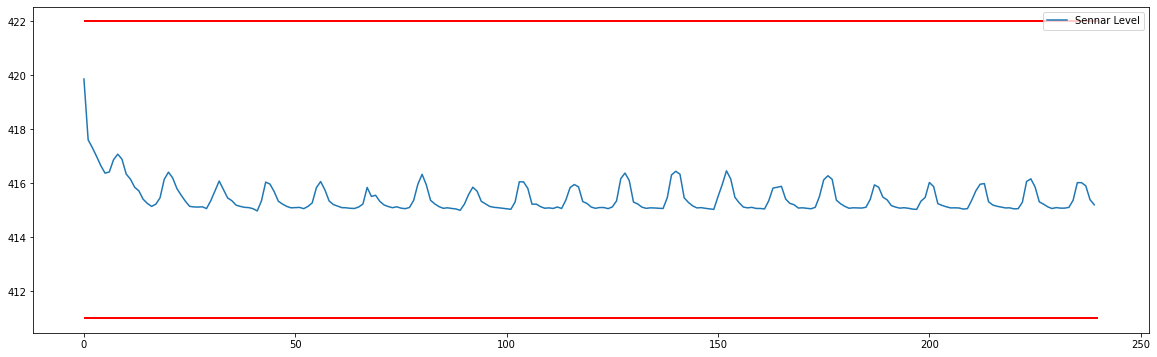

In [15]:
def line_graph_with_limits(vector1, label1, lb, ub):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(vector1, label=label1)
    ax.legend()
    ax.hlines(y=[lb, ub],linewidth=2, xmin = 0, xmax= 240,color="r" )
    plt.show()

line_graph_with_limits(model.reservoirs["Sennar"].level_vector, "Sennar Level", 411, 422 )

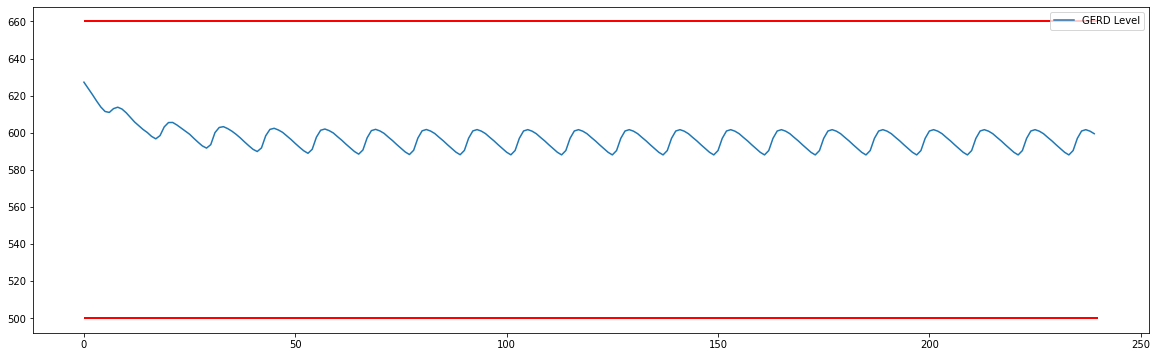

In [16]:
line_graph_with_limits(model.reservoirs["GERD"].level_vector, "GERD Level", 500, 660 )

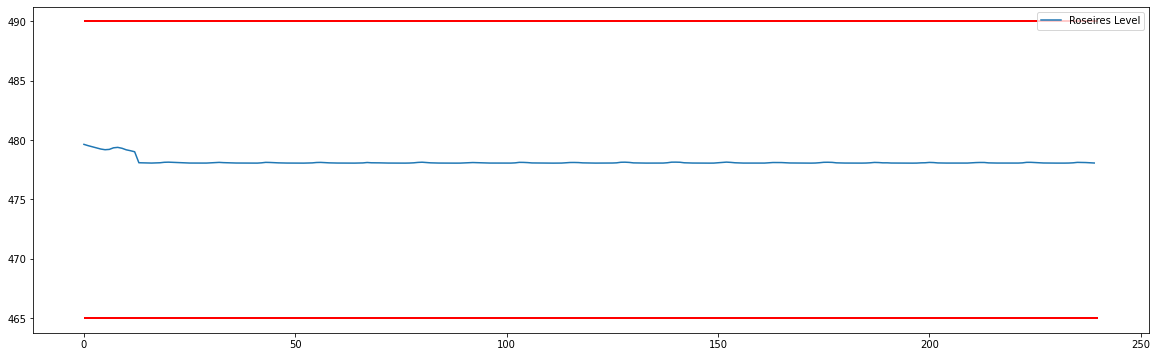

In [17]:
line_graph_with_limits(model.reservoirs["Roseires"].level_vector, "Roseires Level", 465, 490 )

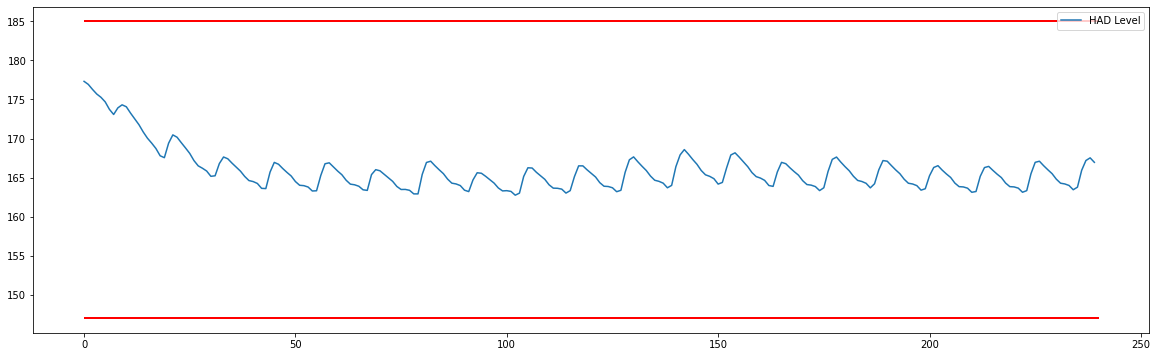

In [18]:
line_graph_with_limits(model.reservoirs["HAD"].level_vector, "HAD Level", 147, 185 )

In [5]:
model.reservoirs["Sennar"].level_vector

array([414.71047908, 415.14391294, 420.19641343, 420.96337392,
       420.16648441, 416.18635478, 478.27867003, 421.3090914 ,
       365.76001081, 427.25056448, 425.55504408, 493.705797  ,
       420.18483507, 434.65396857, 423.01568938, 494.54948249,
       429.01107273, 479.72965272, 424.92711918, 421.17267629,
       419.47476712, 435.89433385, 442.88716453, 453.2920786 ,
       428.44715379, 426.01864295, 465.88380035, 422.0269382 ,
       495.44053188, 424.85913487, 324.41141784, 420.5669038 ,
       416.00901822, 458.32772026, 454.98184944, 418.10031054,
       420.17988762, 430.11885156, 440.54954482, 428.12642902,
       424.81487938, 460.26193418, 421.67238426, 423.35892109,
       430.22673507, 423.10344026, 425.24066634, 421.417355  ,
       456.2464872 , 457.76253524, 230.12469687, 489.02587703,
       422.26416321, 461.62117767, 428.22036008, 398.49086407,
       418.97050002, 418.56438438, 435.90737536, 447.84484725,
       418.45121867, 446.74004585, 468.85753797, 459.60

In [10]:
model.irr_districts["Egypt"].received_flow

array([1310.483871  , 1620.37037   , 1635.304659  , 1589.506173  ,
       1896.654719  , 2438.271605  , 2523.894863  , 2202.807646  ,
       1601.080247  , 1452.359618  , 1481.481481  , 1355.286738  ,
       1310.483871  , 1620.37037   , 1635.304659  , 1589.506173  ,
       1896.654719  , 2438.271605  , 2523.894863  , 2202.807646  ,
       1601.080247  , 1452.359618  , 1481.481481  , 1355.286738  ,
       1310.483871  , 1620.37037   , 1635.304659  , 1589.506173  ,
       1896.654719  , 2438.271605  , 2523.894863  , 2202.807646  ,
       1601.080247  , 1452.359618  , 1481.481481  , 1355.286738  ,
       1310.483871  , 1620.37037   , 1635.304659  , 1589.506173  ,
       1896.654719  , 2048.75590196, 1930.48161084, 2112.16453239,
       1601.080247  , 1452.359618  , 1481.481481  , 1355.286738  ,
       1310.483871  , 1620.37037   , 1635.304659  , 1589.506173  ,
       1896.654719  , 2132.63783376, 2182.25105323, 2161.6222983 ,
       1601.080247  , 1452.359618  , 1481.481481  , 1355.28673

## Platypus (NSGAII)

In [3]:
problem = Problem(model.overarching_policy.get_total_parameter_count(), 3)
problem.types[:] = Real(0, 1)
problem.function = model.evaluate

algorithm = NSGAII(problem=problem, population_size=20)
algorithm.run(1000)

In [12]:
list(algorithm.result[-1].objectives)

[2275030.0694727204, 131.6229258485269, 32.3486392309952]

In [15]:
objectives_outcome = dict()
for i, column_name in enumerate(['Environment','Irrigation','Hydropower']):
    objectives_outcome[column_name] = [s.objectives[i] for s in algorithm.result]

objectives_df = pd.DataFrame(objectives_outcome)


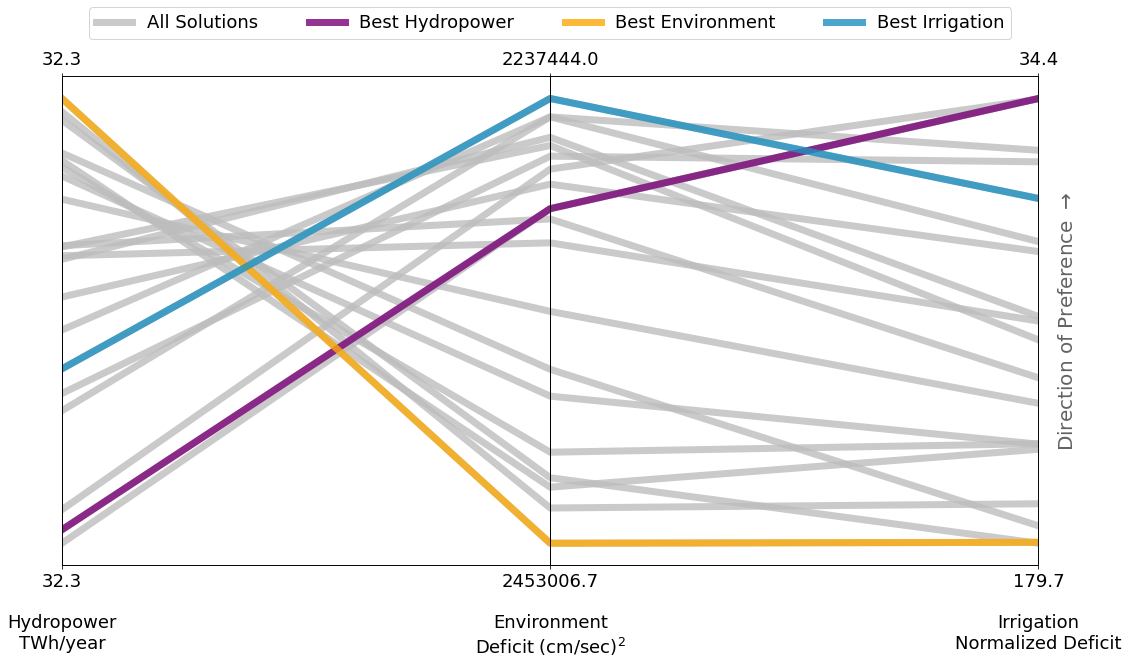

In [16]:
from various_plots import parallel_plots
parallel_plots(objectives_df)

## EMA Workbench

In [2]:
model = ModelZambezi()

In [3]:
def model_wrapper(**kwargs):
    input = [kwargs['v' + str(i)] for i in range(len(kwargs))]
    Hydropower, Environment, Irrigation = tuple(model.evaluate(np.array(input)))
    return Hydropower, Environment, Irrigation


In [4]:
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model)

em_model = Model('zambeziproblem', function=model_wrapper)

em_model.levers = [RealParameter('v' + str(i), -1, 1) for i in range(model.overarching_policy.get_total_parameter_count())]

#specify outcomes
em_model.outcomes = [ScalarOutcome('Hydropower', ScalarOutcome.MINIMIZE),
                  ScalarOutcome('Environment', ScalarOutcome.MINIMIZE),
                  ScalarOutcome('Irrigation', ScalarOutcome.MINIMIZE)]

em_model.constants = [Constant("model", model)]

In [3]:
os.getcwd()
os.chdir("../notebooks")
from model_wrapper import model_wrapper

In [5]:
from ema_workbench import MultiprocessingEvaluator, SequentialEvaluator, IpyparallelEvaluator, ema_logging
from ema_workbench.em_framework.ema_ipyparallel import (start_logwatcher, set_engine_logger,
                                  initialize_engines, cleanup, _run_experiment)

ema_logging.log_to_stderr(ema_logging.INFO)

with SequentialEvaluator(em_model) as evaluator:
    results = evaluator.optimize(nfe=100, searchover='levers',
    epsilons=[0.1,]*len(em_model.outcomes))

[MainProcess/INFO] generation 0: 0/100 nfe
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/em_framework/callbacks.py:192: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name] = pd.Series(dtype=dtype)
[MainProcess/INFO] optimization completed, found 6 solutions


In [5]:
from ema_workbench import MultiprocessingEvaluator, SequentialEvaluator, IpyparallelEvaluator, ema_logging
from ema_workbench.em_framework.ema_ipyparallel import (start_logwatcher, set_engine_logger,
                                  initialize_engines, cleanup, _run_experiment)

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(em_model) as evaluator:
    results = evaluator.optimize(nfe=100, searchover='levers',
    epsilons=[0.1,]*len(em_model.outcomes))

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/100 nfe
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/em_framework/callbacks.py:192: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name] = pd.Series(dtype=dtype)
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
ModuleNotFoundError: No module named 'model_zambezi'
Traceback (most recent call last

KeyboardInterrupt: 

In [6]:
results

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v207,v208,v209,v210,v211,v212,v213,Hydropower,Environment,Irrigation
0,0.779588,0.201705,0.060112,0.636767,0.798581,0.345376,0.653646,-0.620548,-0.662598,-0.217409,...,-0.753119,-0.570332,0.386940,0.723308,0.219570,0.557811,0.441370,2.493837e+06,186.850875,32.348664
1,0.040192,0.347205,0.993078,0.728187,-0.821870,-0.729164,-0.899818,-0.724506,-0.920092,0.252502,...,0.279363,0.186763,0.997651,-0.769177,0.803538,-0.005113,0.040481,2.896740e+06,118.501862,32.348680
2,-0.285869,-0.655546,0.100250,0.311876,0.959539,0.739565,-0.101628,0.573919,-0.678649,0.435777,...,0.686692,-0.341391,-0.696906,-0.452273,-0.033438,-0.096995,-0.893748,2.669807e+06,131.747986,32.348666
3,0.370236,-0.442871,0.229799,-0.915788,0.950993,0.091696,0.605993,0.855763,-0.305694,0.776351,...,-0.433078,-0.266858,0.193569,0.978078,-0.106756,-0.676707,0.417583,2.365792e+06,5631.832971,32.348668
4,-0.928966,0.555090,0.637855,0.019357,0.553940,0.539216,-0.868695,-0.664162,0.754990,-0.663415,...,0.594178,0.641273,0.994029,-0.006891,-0.841706,0.898323,-0.482677,2.945953e+06,22.554832,32.348672
5,0.551018,-0.807415,0.472843,0.784722,0.916855,0.752038,0.337296,0.318805,0.049758,0.458928,...,0.432575,-0.891807,-0.429767,-0.110324,-0.667248,0.147203,0.486275,2.652515e+06,168.650471,32.348670
